In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt

# might be needed depending on your version of Jupyter
%matplotlib inline

In [3]:
df = pd.read_csv('../Oil & Gas Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdT.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [5]:
df.isnull().sum()

START_DATE    0
OIL           0
dtype: int64

In [6]:
df.head()

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857


In [7]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [8]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [9]:
#df.corr()['GAS'].sort_values()

In [10]:
#df.corr()['WATER'].sort_values()

In [11]:
df.corr()

,OIL
OIL,1.0


In [12]:
from datetime import datetime
import statsmodels.api as sm

In [13]:
#df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [14]:
#df['START_DATE']=df['START_DATE'].apply(pd.to_datetime)

In [15]:
df['YEAR'] = df['START_DATE'].apply(lambda START_DATE:int(START_DATE[:-6]))

In [16]:
df = df.drop('START_DATE',axis=1)

In [17]:
df['YEAR']

0      1974
1      1974
2      1974
3      1974
4      1974
       ... 
523    2017
524    2017
525    2017
526    2017
527    2017
Name: YEAR, Length: 528, dtype: int64

In [18]:
X=df['YEAR']
Y=df['OIL']

In [19]:
X

0      1974
1      1974
2      1974
3      1974
4      1974
       ... 
523    2017
524    2017
525    2017
526    2017
527    2017
Name: YEAR, Length: 528, dtype: int64

In [20]:
Y

0       7134368
1       9528303
2      12263786
3      13153821
4      12240857
         ...   
523     8450763
524     8168717
525     8668929
526     8452498
527     8607196
Name: OIL, Length: 528, dtype: int64

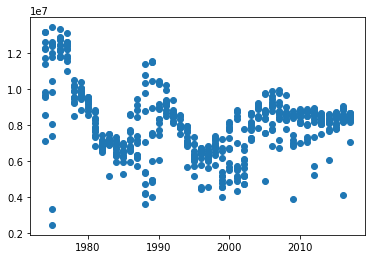

In [21]:
#plt.plot(figsize=(12,8))
plt.scatter(X,Y);
#plt.xlim([80,15])

In [22]:
from scipy import stats
import statsmodels.api as sm

In [23]:
X1=sm.add_constant(X)
reg=sm.OLS(Y,X1).fit()

In [24]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OIL   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     33.65
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.14e-08
Time:                        02:45:18   Log-Likelihood:                -8351.4
No. Observations:                 528   AIC:                         1.671e+04
Df Residuals:                     526   BIC:                         1.672e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.921e+07   1.23e+07      6.456      0.000    5.51e+07    1.03e+08
YEAR       -3.566e+04   6148.261     -5.801      0.000   -4.77e+04   -2.36e+04
==============================================================================
Omnibus:                        0.505   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.381
Skew:                          -0.057   Prob(JB):                        0.826
Kurtosis:                       3.066   Cond. No.                     3.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
slope, intercept, r_value, p_value, std_err=stats.linregress(X,Y)

In [26]:
slope

-35663.0271141649

In [27]:
intercept

79211174.78245242

In [28]:
r_value

-0.24519366852913932

In [29]:
pow(r_value,2)

0.060119935086777446

In [30]:
p_value

1.1422389642872324e-08

In [31]:
std_err

6148.261054161476